#### experiment with varying isotope alignment and correlation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

In [2]:
def model(position, width, height, x_range):
    return  height * np.sqrt(2*np.pi) * width * stats.norm.pdf(x_range, position, width)

In [3]:
isotope_0_df = pd.DataFrame()

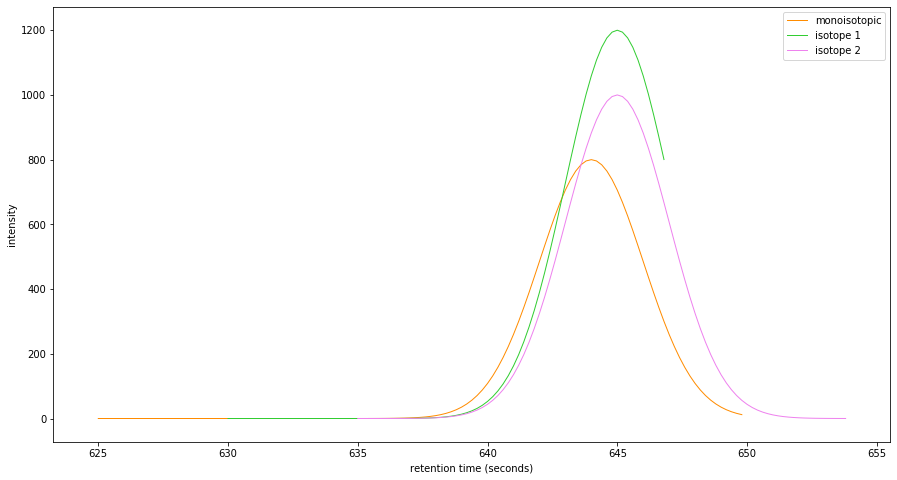

In [4]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)
plt.margins(0.06)

isotope_0_x_range = np.arange(625, 650, 0.2)
isotope_1_x_range = np.arange(630, 647, 0.2)
isotope_2_x_range = np.arange(635, 654, 0.2)

isotope_0 = model(position=644, width=2, height=800, x_range=isotope_0_x_range)
isotope_1 = model(position=645, width=2, height=1200, x_range=isotope_1_x_range)
isotope_2 = model(position=645, width=2, height=1000, x_range=isotope_2_x_range)

isotope_0_df = pd.DataFrame(list(zip(isotope_0_x_range, isotope_0)), columns=['x','intensity'])
isotope_1_df = pd.DataFrame(list(zip(isotope_1_x_range, isotope_1)), columns=['x','intensity'])
isotope_2_df = pd.DataFrame(list(zip(isotope_2_x_range, isotope_2)), columns=['x','intensity'])

ax.plot(isotope_0_df.x, isotope_0_df.intensity, marker='', color='darkorange', linestyle='-', lw=1, ms=30, alpha=1.0, label='monoisotopic')
ax.plot(isotope_1_df.x, isotope_1_df.intensity, marker='', color='limegreen', linestyle='-', lw=1, ms=30, alpha=1.0, label='isotope 1')
ax.plot(isotope_2_df.x, isotope_2_df.intensity, marker='', color='violet', linestyle='-', lw=1, ms=30, alpha=1.0, label='isotope 2')

plt.legend(loc='best')
plt.xlabel('retention time (seconds)')
plt.ylabel('intensity')

plt.show()

In [5]:
def calculate_isotope_correlation(isotope_0_df, isotope_1_df, isotope_2_df):
    # scale the x axis so we can join them
    isotope_0_df['x_scaled'] = (isotope_0_df.x * 100).astype(int)
    isotope_1_df['x_scaled'] = (isotope_1_df.x * 100).astype(int)
    isotope_2_df['x_scaled'] = (isotope_2_df.x * 100).astype(int)

    # combine the isotopes by aligning the x-dimension points they have in common
    rt_combined_df = pd.merge(isotope_0_df, isotope_1_df, on='x_scaled', how='inner', suffixes=('_0', '_1')).sort_values(by='x_scaled')
    rt_combined_df = pd.merge(rt_combined_df, isotope_2_df, on='x_scaled', how='inner', suffixes=('_0', '_2')).sort_values(by='x_scaled')
    rt_combined_df.rename(columns={'intensity': 'intensity_2'}, inplace=True)
    rt_combined_df = rt_combined_df[['x_scaled','intensity_0','intensity_1','intensity_2']]

    # calculate the correlation coefficient
    if len(rt_combined_df) > 0:
        correlation_coefficient_a = np.corrcoef(rt_combined_df[['intensity_0','intensity_1','intensity_2']].values, rowvar=False)
        rt_isotope_correlation = correlation_coefficient_a[1,0]
    else:
        rt_isotope_correlation = 0
    return rt_isotope_correlation


In [6]:
calculate_isotope_correlation(isotope_0_df, isotope_1_df, isotope_2_df)

0.9082704875596556